# Health Insurance Lead Prediction 

Importing libraries and reading data files

In [74]:
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from tqdm import tqdm
import os

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [75]:
# loading of data

train_data = pd.read_csv("train_Df64byy.csv")
test_data = pd.read_csv("test_YCcRUnU.csv")
test=test_data.copy()
train_data=pd.concat([train_data,test],axis=0)

In [76]:
# shape of the test and train data 

print(train_data.shape)
print(test_data.shape)

(72687, 14)
(21805, 13)


In [77]:
# display first few rows of train data 
train_data.head(10)




,Accomodation_Type,City_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,ID,Is_Spouse,Lower_Age,Reco_Insurance_Type,Reco_Policy_Cat,Reco_Policy_Premium,Region_Code,Response,Upper_Age
0,Rented,C3,X1,14+,3.0,1,No,36,Individual,22,11628.0,3213,0.0,36
1,Owned,C5,X2,NaN,NaN,2,No,22,Joint,22,30510.0,1117,0.0,75
2,Owned,C5,NaN,1.0,1.0,3,No,32,Individual,19,7450.0,3732,1.0,32
3,Owned,C24,X1,14+,3.0,4,No,48,Joint,19,17780.0,4378,0.0,52
4,Rented,C8,X2,3.0,1.0,5,No,44,Individual,16,10404.0,2190,0.0,44
5,Rented,C9,X2,5.0,1.0,6,No,52,Individual,22,15264.0,1785,1.0,52
6,Owned,C3,NaN,NaN,NaN,7,No,28,Individual,17,10640.0,679,0.0,28
7,Owned,C1,X4,9.0,4.0,8,Yes,73,Joint,17,29344.0,3175,1.0,75
8,Owned,C15,X1,14.0,3.0,9,No,43,Joint,1,27283.2,3497,0.0,52
9,Owned,C1,NaN,7.0,4.0,10,Yes,26,Joint,18,21100.8,530,1.0,59


In [78]:
#first few rows of test data
test_data.head(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0
5,50888,C1,1329,Rented,Individual,24,24,No,X2,NaN,NaN,18,6150.0
6,50889,C2,3479,Owned,Individual,56,56,No,X5,14+,4.0,17,19152.0
7,50890,C13,396,Rented,Individual,41,41,No,NaN,NaN,NaN,16,11034.0
8,50891,C18,513,Owned,Individual,22,22,No,X3,NaN,NaN,22,10784.0
9,50892,C3,957,Owned,Joint,41,37,Yes,X5,6.0,1.0,22,16934.4


In [79]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 72687 entries, 0 to 21804
Data columns (total 14 columns):
Accomodation_Type          72687 non-null object
City_Code                  72687 non-null object
Health Indicator           55969 non-null object
Holding_Policy_Duration    43833 non-null object
Holding_Policy_Type        43833 non-null float64
ID                         72687 non-null int64
Is_Spouse                  72687 non-null object
Lower_Age                  72687 non-null int64
Reco_Insurance_Type        72687 non-null object
Reco_Policy_Cat            72687 non-null int64
Reco_Policy_Premium        72687 non-null float64
Region_Code                72687 non-null int64
Response                   50882 non-null float64
Upper_Age                  72687 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 8.3+ MB


In [80]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
ID                         21805 non-null int64
City_Code                  21805 non-null object
Region_Code                21805 non-null int64
Accomodation_Type          21805 non-null object
Reco_Insurance_Type        21805 non-null object
Upper_Age                  21805 non-null int64
Lower_Age                  21805 non-null int64
Is_Spouse                  21805 non-null object
Health Indicator           16778 non-null object
Holding_Policy_Duration    13202 non-null object
Holding_Policy_Type        13202 non-null float64
Reco_Policy_Cat            21805 non-null int64
Reco_Policy_Premium        21805 non-null float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [81]:
train_data.nunique()

Accomodation_Type              2
City_Code                     36
Health Indicator               9
Holding_Policy_Duration       15
Holding_Policy_Type            4
ID                         72687
Is_Spouse                      2
Lower_Age                     60
Reco_Insurance_Type            2
Reco_Policy_Cat               22
Reco_Policy_Premium         7685
Region_Code                 5538
Response                       2
Upper_Age                     58
dtype: int64

In [82]:
train_data.isnull().sum()

Accomodation_Type              0
City_Code                      0
Health Indicator           16718
Holding_Policy_Duration    28854
Holding_Policy_Type        28854
ID                             0
Is_Spouse                      0
Lower_Age                      0
Reco_Insurance_Type            0
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Region_Code                    0
Response                   21805
Upper_Age                      0
dtype: int64

In [83]:
test_data.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [84]:
train_data["Response"].value_counts()

0.0    38673
1.0    12209
Name: Response, dtype: int64

In [85]:
""""the postive lead is half as such negative lead"""

'"the postive lead is half as such negative lead'

# Exploratory Data Analysis

In [86]:
# filling of missing values

In [87]:
train_data["Health Indicator"].value_counts()

X1    18624
X2    14848
X3     9608
X4     8185
X5     2408
X6     1794
X7      292
X8      119
X9       91
Name: Health Indicator, dtype: int64

In [88]:

train_data.dropna(axis=0,inplace=True)

In [89]:
train_data["Holding_Policy_Duration"].value_counts()

1.0     3439
2.0     3330
14+     3323
3.0     2756
4.0     2134
5.0     1828
6.0     1465
7.0     1220
8.0     1007
9.0      854
10.0     618
11.0     424
13.0     402
12.0     386
14.0     362
Name: Holding_Policy_Duration, dtype: int64

In [90]:

train_data["Holding_Policy_Duration"].dropna(axis=0)

0        14+
3        14+
4        3.0
5        5.0
7        9.0
        ... 
50875    2.0
50878    7.0
50879    14+
50880    2.0
50881    2.0
Name: Holding_Policy_Duration, Length: 23548, dtype: object

In [91]:
train_data["Holding_Policy_Duration"]

0        14+
3        14+
4        3.0
5        5.0
7        9.0
        ... 
50875    2.0
50878    7.0
50879    14+
50880    2.0
50881    2.0
Name: Holding_Policy_Duration, Length: 23548, dtype: object

In [92]:
train_data["Health Indicator"].value_counts()

X1    7682
X2    6252
X3    3912
X4    3638
X5    1141
X6     700
X7     133
X8      54
X9      36
Name: Health Indicator, dtype: int64

In [93]:
train_data["Holding_Policy_Type"].value_counts()

3.0    10237
1.0     6307
2.0     3817
4.0     3187
Name: Holding_Policy_Type, dtype: int64

In [230]:

train_data["Holding_Policy_Type"].dropna(axis=0)

0        3.0
3        3.0
4        1.0
5        1.0
7        4.0
        ... 
50875    1.0
50878    3.0
50879    1.0
50880    2.0
50881    3.0
Name: Holding_Policy_Type, Length: 23548, dtype: float64

In [231]:
train_data["Holding_Policy_Type"].isnull().sum()

0

In [96]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23548 entries, 0 to 50881
Data columns (total 14 columns):
Accomodation_Type          23548 non-null object
City_Code                  23548 non-null object
Health Indicator           23548 non-null object
Holding_Policy_Duration    23548 non-null object
Holding_Policy_Type        23548 non-null float64
ID                         23548 non-null int64
Is_Spouse                  23548 non-null object
Lower_Age                  23548 non-null int64
Reco_Insurance_Type        23548 non-null object
Reco_Policy_Cat            23548 non-null int64
Reco_Policy_Premium        23548 non-null float64
Region_Code                23548 non-null int64
Response                   23548 non-null float64
Upper_Age                  23548 non-null int64
dtypes: float64(3), int64(5), object(6)
memory usage: 2.7+ MB


Accomodation

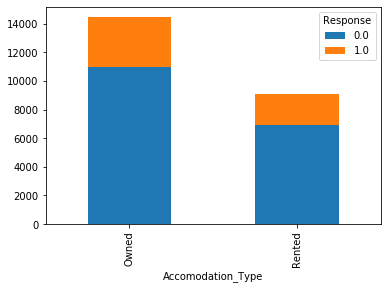

In [97]:
train_data.groupby(["Accomodation_Type", 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

In [98]:
print(train_data["Accomodation_Type"].value_counts())
print(test_data["Accomodation_Type"].value_counts())

Owned     14457
Rented     9091
Name: Accomodation_Type, dtype: int64
Owned     12090
Rented     9715
Name: Accomodation_Type, dtype: int64


 Reco_insurance_type

In [99]:
train_data.groupby(['Reco_Insurance_Type', 'Response']).size().unstack()

Response,0.0,1.0
Reco_Insurance_Type,,
Individual,13715,4332
Joint,4133,1368


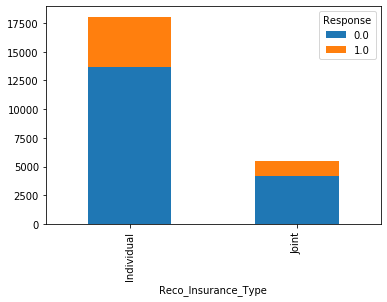

In [100]:
train_data.groupby(["Reco_Insurance_Type", 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

In [101]:
# individual reco type people has more positive lead

In [102]:
train_data.groupby(['Is_Spouse', 'Response']).size().unstack()

Response,0.0,1.0
Is_Spouse,,
No,14458,4605
Yes,3390,1095


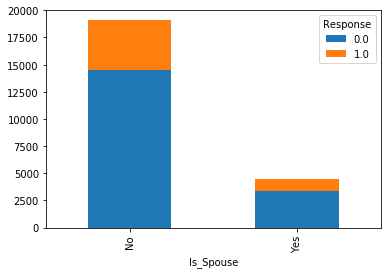

In [103]:
train_data.groupby(["Is_Spouse", 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

In [104]:
train_data["Upper_Age"].value_counts()

75    1655
28     526
25     510
27     504
26     496
52     486
54     481
55     475
29     468
48     461
24     455
59     451
30     448
57     447
56     445
58     444
31     438
42     437
61     437
53     436
51     433
46     432
44     432
35     430
32     430
41     430
43     428
49     427
50     426
65     425
60     424
33     415
66     409
45     409
47     408
63     404
40     399
70     396
34     395
64     392
36     392
39     379
62     377
38     375
37     375
23     355
67     343
69     319
68     315
71     315
72     304
73     269
22     236
74     231
21     119
Name: Upper_Age, dtype: int64

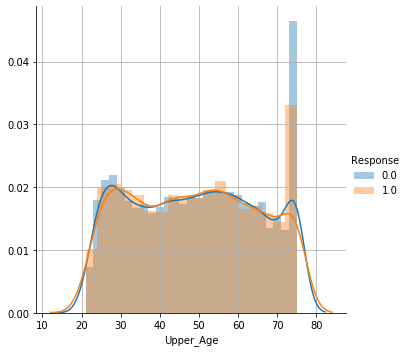

In [105]:
sns.FacetGrid(data = train_data, hue = 'Response', height = 5).map(sns.distplot, 'Upper_Age').add_legend()
plt.grid()
plt.show()

In [106]:
train_data["Lower_Age"].value_counts()

75    1242
28     589
25     575
26     563
27     556
24     523
29     516
32     473
30     473
33     463
55     462
31     453
52     452
35     447
23     445
58     428
51     420
57     420
34     419
54     416
41     414
50     413
48     412
53     409
65     409
49     408
40     407
60     402
43     398
46     398
56     397
59     394
66     394
37     389
36     389
45     389
61     389
42     387
62     385
47     382
38     381
44     381
39     371
63     367
64     364
70     348
22     341
68     308
71     292
67     291
69     275
72     245
21     229
73     229
74     205
16     144
20     129
18     120
19     116
17     112
Name: Lower_Age, dtype: int64

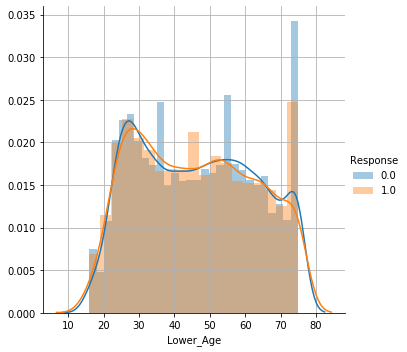

In [107]:
sns.FacetGrid(data = train_data, hue = 'Response', height = 5).map(sns.distplot, 'Lower_Age').add_legend()
plt.grid()
plt.show()

In [108]:
# Age between 23 and 25 , > 70 have no response to health insurance

In [109]:
train_data.groupby(['Health Indicator', 'Response']).size().unstack()

Response,0.0,1.0
Health Indicator,,
X1,5791,1891
X2,4724,1528
X3,2997,915
X4,2753,885
X5,890,251
X6,534,166
X7,90,43
X8,41,13
X9,28,8


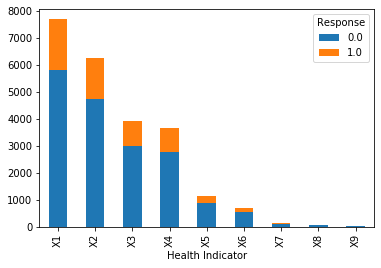

In [110]:
train_data.groupby(["Health Indicator", 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

In [111]:
# more response from X1

In [112]:
train_data.groupby(['Holding_Policy_Duration', 'Response']).size().unstack()

Response,0.0,1.0
Holding_Policy_Duration,,
1.0,2668,771
10.0,456,162
11.0,317,107
12.0,295,91
13.0,297,105
14+,2474,849
14.0,271,91
2.0,2542,788
3.0,2109,647


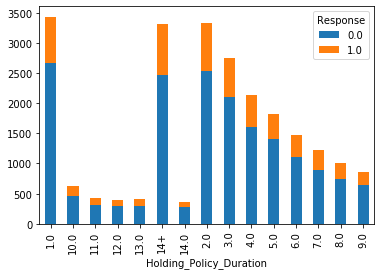

In [113]:
train_data.groupby(["Holding_Policy_Duration", 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

In [114]:
train_data.groupby(['Holding_Policy_Type', 'Response']).size().unstack()

Response,0.0,1.0
Holding_Policy_Type,,
1.0,4779,1528
2.0,2944,873
3.0,7753,2484
4.0,2372,815


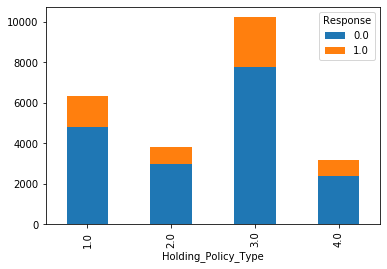

In [115]:
train_data.groupby(["Holding_Policy_Type", 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()


In [116]:
train_data.groupby(['Reco_Policy_Cat', 'Response']).size().unstack()

Response,0.0,1.0
Reco_Policy_Cat,,
1,941,3
2,710,117
3,390,98
4,397,39
5,328,138
6,317,57
7,310,70
8,266,100
9,309,61


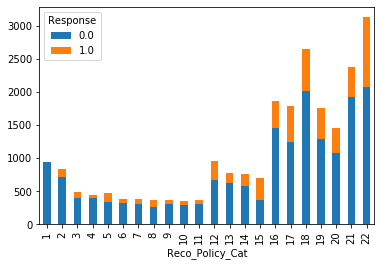

In [117]:
train_data.groupby(["Reco_Policy_Cat", 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

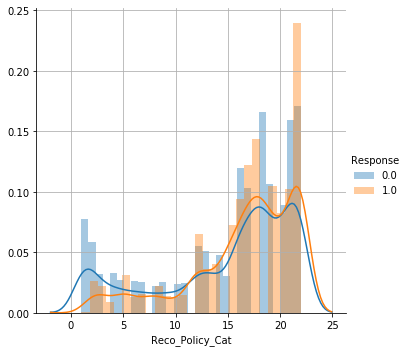

In [118]:
# more response from 12 
sns.FacetGrid(data = train_data, hue = 'Response', height = 5).map(sns.distplot, 'Reco_Policy_Cat').add_legend()
plt.grid()
plt.show()

In [119]:
train_data['Reco_Policy_Premium'].describe()

count    23548.000000
mean     15409.000161
std       6416.327319
min       3216.000000
25%      10704.000000
50%      14580.000000
75%      19140.000000
max      43350.400000
Name: Reco_Policy_Premium, dtype: float64

In [120]:
np.percentile(train_data['Reco_Policy_Premium'], np.arange(90, 101))

array([24188.08 , 24760.624, 25401.6  , 26079.564, 26843.472, 27704.34 ,
       28806.4  , 29988.   , 31290.18 , 33339.68 , 43350.4  ])

In [121]:
train_data['Reco_Policy_Premium'].value_counts()

15288.0    29
16128.0    28
15600.0    28
10224.0    28
17640.0    28
           ..
25056.0     1
23776.0     1
19612.8     1
7540.0      1
20174.0     1
Name: Reco_Policy_Premium, Length: 5417, dtype: int64

In [122]:
np.percentile(train_data['Reco_Policy_Premium'], 99.9)

39178.37160000038

In [123]:
np.percentile(train_data['Reco_Policy_Premium'], 99)

33339.67999999998

In [124]:
np.percentile(test_data['Reco_Policy_Premium'], np.arange(90, 101))

array([23104.   , 23605.568, 24164.48 , 24843.456, 25614.624, 26602.8  ,
       27694.464, 28741.2  , 30191.432, 32536.688, 43776.   ])

In [125]:
np.percentile(test_data['Reco_Policy_Premium'], 99.9)

38022.72400000007

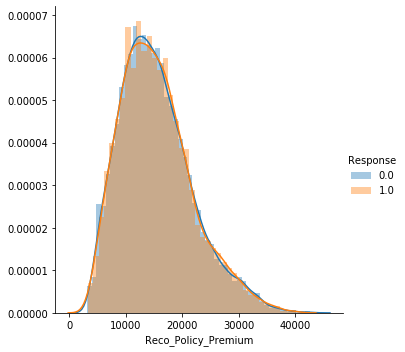

In [126]:
# how does annual premium influence response

sns.FacetGrid(data = train_data, hue = 'Response', height = 5).map(sns.distplot, 'Reco_Policy_Premium').add_legend()
plt.show()

In [127]:
# there is a little variation between 10000 and 20000

In [128]:
train_data["Region_Code"].value_counts()

1       47
4       41
5       38
6       36
10      35
        ..
3477     1
5439     1
5526     1
5455     1
6103     1
Name: Region_Code, Length: 4760, dtype: int64

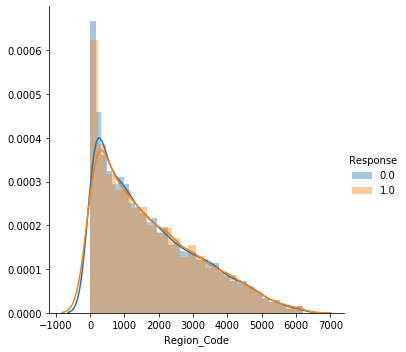

In [129]:

sns.FacetGrid(data = train_data, hue = 'Response', height = 5).map(sns.distplot, 'Region_Code').add_legend()
plt.show()

In [130]:
train_data["City_Code"].value_counts()

C1     4397
C2     3800
C3     2249
C4     1577
C9      932
C7      902
C8      843
C6      831
C10     764
C5      615
C15     576
C17     533
C11     515
C16     456
C20     435
C13     431
C19     407
C12     396
C18     351
C21     351
C14     335
C24     290
C23     244
C22     227
C26     225
C29     168
C25     165
C28     131
C27     116
C33     103
C32      59
C34      51
C30      27
C35      24
C36      15
C31       7
Name: City_Code, dtype: int64

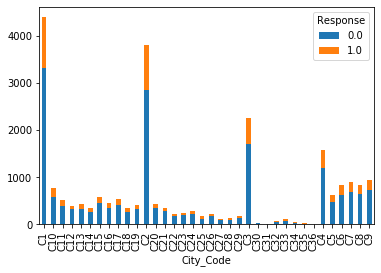

In [131]:
train_data.groupby(["City_Code", 'Response']).size().unstack().plot(kind = 'bar', stacked = True)
plt.show()

#  Data Cleaning and Pre-processing


In [132]:
train_data.head()

,Accomodation_Type,City_Code,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,ID,Is_Spouse,Lower_Age,Reco_Insurance_Type,Reco_Policy_Cat,Reco_Policy_Premium,Region_Code,Response,Upper_Age
0,Rented,C3,X1,14+,3.0,1,No,36,Individual,22,11628.0,3213,0.0,36
3,Owned,C24,X1,14+,3.0,4,No,48,Joint,19,17780.0,4378,0.0,52
4,Rented,C8,X2,3.0,1.0,5,No,44,Individual,16,10404.0,2190,0.0,44
5,Rented,C9,X2,5.0,1.0,6,No,52,Individual,22,15264.0,1785,1.0,52
7,Owned,C1,X4,9.0,4.0,8,Yes,73,Joint,17,29344.0,3175,1.0,75


In [133]:
test_data["Health Indicator"].value_counts()

X1    5614
X2    4516
X3    2846
X4    2442
X5     681
X6     514
X7      96
X8      41
X9      28
Name: Health Indicator, dtype: int64

In [191]:
test_data["Health Indicator"]=test_data["Health Indicator"].fillna("X1")
test_data["Holding_Policy_Duration"]=test_data["Holding_Policy_Duration"].fillna("14+")
test_data["Holding_Policy_Type"]=test_data["Holding_Policy_Type"].fillna(3.0)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
ID                         21805 non-null int64
City_Code                  21805 non-null object
Region_Code                21805 non-null int64
Accomodation_Type          21805 non-null object
Reco_Insurance_Type        21805 non-null object
Upper_Age                  21805 non-null int64
Lower_Age                  21805 non-null int64
Is_Spouse                  21805 non-null object
Health Indicator           21805 non-null object
Holding_Policy_Duration    21805 non-null object
Holding_Policy_Type        21805 non-null float64
Reco_Policy_Cat            21805 non-null int64
Reco_Policy_Premium        21805 non-null float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [192]:
# Accomodation

X_acc = train_data['Accomodation_Type'].apply(lambda x: 1 if x == 'Owned' else 0)
X_acc = X_acc.values.reshape(-1, 1)
print(X_acc.shape)
acc=pd.DataFrame(X_acc)
X_test_acc = test_data['Accomodation_Type'].apply(lambda x: 1 if x == 'Owned' else 0)
X_test_acc = X_test_acc.values.reshape(-1, 1)
print(X_test_acc.shape)

(23548, 1)
(21805, 1)


In [193]:
#Reco_Insurance_Type
X_train_Reco_Insurance_Type = train_data['Reco_Insurance_Type'].apply(lambda x: 1 if x == 'Individual' else 0)
X_train_Reco_Insurance_Type = X_train_Reco_Insurance_Type.values.reshape(-1, 1)
print(X_train_Reco_Insurance_Type.shape)
X_test_Reco_Insurance_Type = test_data['Reco_Insurance_Type'].apply(lambda x: 1 if x == 'Individual' else 0)
X_test_Reco_Insurance_Type = X_test_Reco_Insurance_Type.values.reshape(-1, 1)
print(X_test_Reco_Insurance_Type.shape)


(23548, 1)
(21805, 1)


In [194]:
# Is_Spouse
# train data
X_train_Is_Spouse = train_data['Is_Spouse'].apply(lambda x: 1 if x == 'No' else 0)
X_train_Is_Spouse = X_train_Is_Spouse.values.reshape(-1, 1)
print(X_train_Is_Spouse.shape)
X_test_Is_Spouse = test_data['Is_Spouse'].apply(lambda x: 1 if x == 'No' else 0)
X_test_Is_Spouse = X_test_Is_Spouse.values.reshape(-1, 1)
print(X_test_Is_Spouse.shape)

(23548, 1)
(21805, 1)


In [232]:
from sklearn.preprocessing import MinMaxScaler
# upper age scalar
scaler = MinMaxScaler()
scaler.fit(train_data['Upper_Age'].values.reshape(-1, 1))
X_train_Upper_age = scaler.transform(train_data['Upper_Age'].values.reshape(-1, 1))
X_test_Upper_age = scaler.transform(test_data['Upper_Age'].values.reshape(-1, 1))

print(X_train_Upper_age.shape)
print(X_test_Upper_age.shape)
d=pd.DataFrame(X_train_Upper_age)

(23548, 1)
(21805, 1)


In [196]:
X_train_U_age_n = train_data['Upper_Age'].values.reshape(-1, 1)
X_test_U_age_n = test_data['Upper_Age'].values.reshape(-1, 1)
# upper age numerical
print(X_train_U_age_n.shape)
print(X_test_U_age_n.shape)

(23548, 1)
(21805, 1)


In [197]:
from sklearn.preprocessing import MinMaxScaler
#lower age scalar
scaler = MinMaxScaler()
scaler.fit(train_data['Lower_Age'].values.reshape(-1, 1))
X_train_Lower_age = scaler.transform(train_data['Lower_Age'].values.reshape(-1, 1))
X_test_Lower_age = scaler.transform(test_data['Lower_Age'].values.reshape(-1, 1))

print(X_train_Lower_age.shape)
print(X_test_Lower_age.shape)
e=pd.DataFrame(X_train_Lower_age)

(23548, 1)
(21805, 1)


In [198]:
X_train_L_age_n = train_data['Lower_Age'].values.reshape(-1, 1)
X_test_L_age_n = test_data['Lower_Age'].values.reshape(-1, 1)
# lower age numerical
print(X_train_L_age_n.shape)
print(X_test_L_age_n.shape)

(23548, 1)
(21805, 1)


In [199]:
# one-hot encoding 'Region code'
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(train_data['City_Code'].values.reshape(-1, 1))
# region code scalar
X_train_City_code = encoder.transform(train_data['City_Code'].values.reshape(-1, 1))
X_test_City_code = encoder.transform(test_data['City_Code'].values.reshape(-1, 1))

print(X_train_City_code.shape)
print(X_test_City_code.shape)
f=pd.DataFrame(X_train_City_code)


(23548, 36)
(21805, 36)


In [200]:
def get_feat_dict(feature):
    value_count = train_data[feature].value_counts() # value counts of each feature
    my_dict = dict()  # initialize a dictionary
    for i, denominator in value_count.items():
        class_count = train_data[(train_data['Response'] == 1) & (train_data[feature] == i)]
        my_dict[i] = round((class_count.shape[0]/denominator), 6)
    return my_dict

In [201]:
City_code_dict = get_feat_dict('City_Code')
City_code_dict


{'C1': 0.246759,
 'C2': 0.252105,
 'C3': 0.241885,
 'C4': 0.247305,
 'C9': 0.223176,
 'C7': 0.251663,
 'C8': 0.241993,
 'C6': 0.246691,
 'C10': 0.229058,
 'C5': 0.239024,
 'C15': 0.21875,
 'C17': 0.236398,
 'C11': 0.262136,
 'C16': 0.252193,
 'C20': 0.227586,
 'C13': 0.25058,
 'C19': 0.218673,
 'C12': 0.194444,
 'C18': 0.233618,
 'C21': 0.225071,
 'C14': 0.253731,
 'C24': 0.213793,
 'C23': 0.20082,
 'C22': 0.246696,
 'C26': 0.213333,
 'C29': 0.25,
 'C25': 0.266667,
 'C28': 0.251908,
 'C27': 0.241379,
 'C33': 0.252427,
 'C32': 0.254237,
 'C34': 0.27451,
 'C30': 0.259259,
 'C35': 0.333333,
 'C36': 0.2,
 'C31': 0.142857}

In [202]:
X_train_City_code_resp = train_data['City_Code'].apply(lambda x: City_code_dict[x])
X_train_City_code_resp = X_train_City_code_resp.values.reshape(-1, 1)
print(X_train_City_code_resp.shape)
X_test_City_code_resp = test_data['City_Code'].apply(lambda x: City_code_dict[x])
X_test_City_code_resp = X_test_City_code_resp.values.reshape(-1, 1)
print(X_test_City_code_resp)

(23548, 1)
[[0.246759]
 [0.247305]
 [0.246759]
 ...
 [0.194444]
 [0.229058]
 [0.252105]]


In [203]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(train_data['Health Indicator'].values.reshape(-1, 1))

X_train_Health_Indicator = encoder.transform(train_data['Health Indicator'].values.reshape(-1, 1))
X_test_Health_Indicator = encoder.transform(test_data['Health Indicator'].values.reshape(-1, 1))

print(X_train_Health_Indicator.shape)
print(X_test_Health_Indicator.shape)


(23548, 9)
(21805, 9)


In [204]:
HI_dict = get_feat_dict('Health Indicator')
HI_dict

{'X1': 0.24616,
 'X2': 0.244402,
 'X3': 0.233896,
 'X4': 0.243266,
 'X5': 0.219982,
 'X6': 0.237143,
 'X7': 0.323308,
 'X8': 0.240741,
 'X9': 0.222222}

In [205]:
X_HI_resp = train_data['Health Indicator'].apply(lambda x: HI_dict[x])
X_HI_resp = X_HI_resp.values.reshape(-1, 1)
print(X_HI_resp.shape)

(23548, 1)


In [206]:
X_ID = test_data['ID'].values.reshape(-1, 1)
print(X_ID.shape)
X_ID_train = train_data['ID'].values.reshape(-1, 1)
X_ID_train.shape

(21805, 1)


(23548, 1)

In [207]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(train_data['Holding_Policy_Duration'].values.reshape(-1, 1))

X_Holding_Policy_Duration_code = encoder.transform(train_data['Holding_Policy_Duration'].values.reshape(-1, 1))
X_Holding_Policy_Duration_test = encoder.transform(test_data['Holding_Policy_Duration'].values.reshape(-1, 1))
print(X_Holding_Policy_Duration_code.shape)
print(X_Holding_Policy_Duration_test.shape)

(23548, 15)
(21805, 15)


In [208]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(train_data['Holding_Policy_Type'].values.reshape(-1, 1))

X_Holding_Policy_Type_train = encoder.transform(train_data['Holding_Policy_Type'].values.reshape(-1, 1))
X_Holding_Policy_Type_test = encoder.transform(test_data['Holding_Policy_Type'].values.reshape(-1, 1))

print(X_Holding_Policy_Type_train.shape)
print(X_Holding_Policy_Type_test.shape)

(23548, 4)
(21805, 4)


In [209]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit(train_data['Reco_Policy_Cat'].values.reshape(-1, 1))

X_Reco_Policy_Cat_train = encoder.transform(train_data['Reco_Policy_Cat'].values.reshape(-1, 1))
X_Reco_Policy_Cat_test = encoder.transform(test_data['Reco_Policy_Cat'].values.reshape(-1, 1))
print(X_Reco_Policy_Cat_train.shape)
print(X_Reco_Policy_Cat_test.shape)

(23548, 22)
(21805, 22)


In [210]:
X_Reco_Policy_Premium_n = train_data['Reco_Policy_Premium'].values.reshape(-1, 1)
X_Reco_Policy_test = test_data['Reco_Policy_Premium'].values.reshape(-1, 1)

print(X_Reco_Policy_Premium_n.shape)
print(X_Reco_Policy_test.shape)

(23548, 1)
(21805, 1)


In [211]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_data['Reco_Policy_Premium'].values.reshape(-1, 1))
X_train_RP_age = scaler.transform(train_data['Reco_Policy_Premium'].values.reshape(-1, 1))
X_test_RP_age = scaler.transform(test_data['Reco_Policy_Premium'].values.reshape(-1, 1))

print(X_train_RP_age.shape)


(23548, 1)


In [212]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_data['Region_Code'].values.reshape(-1, 1))
X_train_RC_age = scaler.transform(train_data['Region_Code'].values.reshape(-1, 1))


print(X_train_RC_age)

[[5.18650089e-01]
 [7.06765703e-01]
 [3.53463588e-01]
 ...
 [7.12094300e-02]
 [4.84417891e-04]
 [6.24091716e-01]]


# Stacking all the features together

In [233]:
y_train= train_data['Response']

In [214]:
from scipy.sparse import hstack

X_train_ohe = hstack((X_acc,
                      X_train_Reco_Insurance_Type,
                      X_train_Is_Spouse,
                      X_train_Upper_age,
                      X_train_Lower_age,
                      X_train_City_code,
                      X_train_Health_Indicator,
                      X_Holding_Policy_Duration_code,
                      X_Holding_Policy_Type_train,
                      X_Reco_Policy_Cat_train,
                      X_train_RP_age,))
X_test_ohe = hstack((    X_test_acc,
X_test_Reco_Insurance_Type,
X_test_Is_Spouse,
X_test_U_age_n,
X_test_L_age_n,
X_test_City_code,
X_test_Health_Indicator,
X_Holding_Policy_Duration_test,
X_Holding_Policy_Type_test,
X_Reco_Policy_Cat_test.shape,
X_Reco_Policy_test,
))
print(X_train_ohe.shape)
print(X_test_ohe.shape)


(23548, 92)
(21805, 92)


In [215]:
print("train data shape:", (X_train_ohe.shape, y_train.shape))

train data shape: ((23548, 92), (23548,))


# Building Machine Learning Models

In [216]:
test_data

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,X1,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,1.0,3.0,5,22534.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21800,72683,C3,1044,Owned,Individual,45,45,No,X1,4.0,1.0,18,15884.0
21801,72684,C4,266,Owned,Individual,59,59,No,X5,6.0,3.0,18,21390.0
21802,72685,C12,2470,Owned,Individual,74,74,No,X3,1.0,3.0,1,17836.0
21803,72686,C10,1676,Rented,Individual,25,25,No,X4,3.0,1.0,19,11568.0


In [217]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

In [ ]:

#running Various Machine Learning model

In [ ]:
#Finding the best model based on the ROC value

In [218]:
sgd = SGDClassifier(loss = 'hinge', class_weight = 'balanced') 
parameter = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]} # setting hyperparameter from 10^-3 to 10^3 in powers of 10
clf = GridSearchCV(sgd, parameter, cv = 5, scoring = 'roc_auc', n_jobs = -1, return_train_score = True)
clf.fit(X_train_ohe, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight='balanced',
                                     early_stopping=False, epsilon=0.1,
                                     eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
        

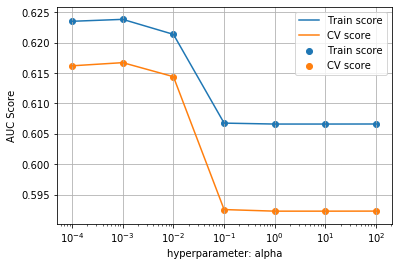

In [219]:

train_loss = clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 
plt.plot(parameter['alpha'], train_loss, label = 'Train score')
plt.plot(parameter['alpha'], cv_loss, label = 'CV score')

plt.scatter(parameter['alpha'], train_loss, label = 'Train score')
plt.scatter(parameter['alpha'], cv_loss, label = 'CV score')
plt.xscale('log') 

plt.legend()
plt.xlabel("hyperparameter: alpha")
plt.ylabel("AUC Score")
plt.grid()
plt.show()

In [220]:
from sklearn.metrics import roc_auc_score

sgd_clf = SGDClassifier(loss = 'log', class_weight= 'balanced', random_state = 42) # default penalty is L2
sgd_clf.fit(X_train_ohe, y_train)
sig_clf = CalibratedClassifierCV(sgd_clf, method = "sigmoid")
sig_clf.fit(X_train_ohe, y_train)

y_pred_train = sig_clf.predict_proba(X_train_ohe)
y_pred_test = sig_clf.predict_proba(X_test_ohe)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score: 0.6308109366030495


In [221]:
sgd_df = pd.DataFrame(data = {'ID':test_data['ID'], 'Response':y_pred_test[:, 1]})
sgd_df.head()
sgd_df.to_csv("sub1.csv",index=False)

In [222]:
submission = pd.DataFrame()
submission['ID'] = test_copy['ID']
submission['Response'] = ypred_test

submission.to_csv('file_name',index=False)

NameError: name 'test_copy' is not defined

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV

sgd = SGDClassifier(loss = 'log', class_weight = 'balanced') # default penalty is L2 
parameter = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]} # setting hyperparameter from 10^-3 to 10^3 in powers of 10
clf = GridSearchCV(sgd, parameter, cv = 5, scoring = 'roc_auc', n_jobs = -1, return_train_score = True)
clf.fit(X_train_ohe, y_train)

In [ ]:
# Plotting AUC_Scores for train data and CV data to determine optimal hyperparameter

train_loss = clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 
plt.plot(parameter['alpha'], train_loss, label = 'Train score')
plt.plot(parameter['alpha'], cv_loss, label = 'CV score')

plt.scatter(parameter['alpha'], train_loss, label = 'Train score')
plt.scatter(parameter['alpha'], cv_loss, label = 'CV score')
plt.xscale('log') 

plt.legend()
plt.xlabel("hyperparameter: alpha")
plt.ylabel("AUC Score")
plt.grid()
plt.show()

In [ ]:
sgd = SGDClassifier(loss = 'log', class_weight = 'balanced',  l1_ratio = 1 ) 
parameter = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]} # setting hyperparameter from 10^-3 to 10^3 in powers of 10
sig_clf= GridSearchCV(sgd, parameter, cv = 5, scoring = 'roc_auc', n_jobs = -1, return_train_score = True)
sig_clf.fit(X_train_ohe, y_train)
sig_clf = CalibratedClassifierCV(sgd, method = "sigmoid")
sig_clf.fit(X_train_ohe, y_train)

y_pred_train = sig_clf.predict_proba(X_train_ohe)
y_pred_test = sig_clf.predict_proba(X_test_ohe)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

In [223]:
from sklearn.naive_bayes import MultinomialNB

mul_NB = MultinomialNB() 
parameters = {'alpha' :[0.0001,0.001,0.01,0.1,1,10,100,1000]}
clf = GridSearchCV(mul_NB, parameters, cv = 5, scoring = 'roc_auc', n_jobs = -1, return_train_score = True)
sig_clf.fit(X_train_ohe, y_train)
sig_clf = CalibratedClassifierCV(mul_NB, method = "sigmoid")
sig_clf.fit(X_train_ohe, y_train)

y_pred_train = sig_clf.predict_proba(X_train_ohe)
y_pred_test = sig_clf.predict_proba(X_test_ohe)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))


Train Score: 0.6247866732328355


In [224]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier() 
rfc.fit(X_train_ohe, y_train)
sig_clf = CalibratedClassifierCV(rfc, method = "sigmoid")
sig_clf.fit(X_train_ohe, y_train)

y_pred_train = sig_clf.predict_proba(X_train_ohe)
y_pred_test = sig_clf.predict_proba(X_test_ohe)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))


Train Score: 0.9992045646669341


In [ ]:
sgd_df = pd.DataFrame(data = {'ID':test_data['ID'], 'Response':y_pred_test[:, 1]})
sgd_df.head()
sgd_df.to_csv("subnew2.csv",index=False)


In [225]:
sgd_df = pd.DataFrame(data = {'ID':test_data['ID'], 'Response':y_pred_test[:, 1]})
sgd_df.head()
sgd_df.to_csv("sub14new.csv",index=False)

In [226]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(n_estimators = 150, max_depth = 11, colsample_bytree = 0.6, class_n_jobs = -1, random_state = 21)
xgb.fit(X_train_ohe, y_train)
sig_clf = CalibratedClassifierCV(xgb, method = "sigmoid")
sig_clf.fit(X_train_ohe, y_train)

y_pred_train = sig_clf.predict_proba(X_train_ohe)
y_pred_test = sig_clf.predict_proba(X_test_ohe)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

[19:10:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { class_n_jobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:10:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[19:10:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { class_n_jobs } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not u

In [ ]:
sgd_df = pd.DataFrame(data = {'ID':test_data['ID'], 'Response':y_pred_test[:, 1]})
sgd_df.head()
sgd_df.to_csv("sub3.csv",index=False)

In [ ]:
rfc = RandomForestClassifier(n_estimators = 250, max_depth = 15, random_state = 101, n_jobs = -1) 
rfc.fit(X_train_ohe, y_train)
sig_clf = CalibratedClassifierCV(rfc, method = "sigmoid")
sig_clf.fit(X_train_ohe, y_train)

y_pred_train = sig_clf.predict_proba(X_train_ohe)
y_pred_test = sig_clf.predict_proba(X_test_ohe)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

In [ ]:
sgd_df = pd.DataFrame(data = {'ID':test_data['ID'], 'Response':y_pred_test[:, 1]})
sgd_df.head()
sgd_df.to_csv("sub4.csv",index=False)

In [ ]:
X_train_acc,
X_train_Reco_Insurance_Type,
X_train_Is_Spouse,
X_train_Upper_age,
X_train_Lower_age,
X_train_City_code_resp,
X_Holding_Policy_Duration_code,
X_Holding_Policy_Type_train,
X_Reco_Policy_Cat_train,
X_Reco_Policy_test,
X_train_RP_age
X_ID_train

In [ ]:
from scipy.sparse import hstack

X_train = hstack((X_acc,
X_train_Reco_Insurance_Type,
X_train_Is_Spouse,
X_train_Upper_age,
X_train_Lower_age,
X_train_City_code_resp,
X_Holding_Policy_Duration_code,
X_Holding_Policy_Type_train,
X_Reco_Policy_Cat_train,
X_train_RP_age,
X_ID_train,))
X_test = hstack((   X_test_acc,
X_test_Reco_Insurance_Type,
X_test_Is_Spouse,
X_test_Upper_age,
X_test_Lower_age,
X_test_City_code_resp,
X_Holding_Policy_Duration_test,
X_Holding_Policy_Type_test,
X_Reco_Policy_Cat_test,
X_test_RP_age,
X_ID,
))
print(X_train.shape)
print(X_test.shape)


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.calibration import CalibratedClassifierCV

LGB_model = LGBMClassifier(max_depth = 8, n_estimators = 300, reg_lambda = 1.2, reg_alpha = 1.2, min_child_weight = 1, verbose  = 1,
                          learning_rate = 0.15, gamma = 0.3, colsample_bytree = 0.6, eval_metric = 'auc', is_higher_better = 1, plot = True)
LGB_model.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(LGB_model, method = "sigmoid")
sig_clf.fit(X_train, y_train)

y_pred_train = sig_clf.predict_proba(X_train)
y_pred_test = sig_clf.predict_proba(X_test)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))


In [ ]:
from xgboost.sklearn import XGBClassifier

xgb = XGBClassifier(n_estimators = 150, max_depth = 11, colsample_bytree = 0.6, n_jobs = -1, random_state = 21)
xgb.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(xgb, method = "sigmoid")
sig_clf.fit(X_train, y_train)

y_pred_train = sig_clf.predict_proba(X_train)
y_pred_test = sig_clf.predict_proba(X_test)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

In [227]:
sgd_df = pd.DataFrame(data = {'ID':test_data['ID'], 'Response':y_pred_test[:, 1]})
sgd_df.head()
sgd_df.to_csv("sub7.csv",index=False)

In [229]:


sgd_df = pd.DataFrame(data = {'ID':test_data['ID'], 'Response':y_pred_test[:, 1]})
sgd_df.head()
sgd_df.to_csv("sub15new.csv",index=False)


# Final model

In [234]:
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier() 
rfc.fit(X_train_ohe, y_train)
sig_clf = CalibratedClassifierCV(rfc, method = "sigmoid")
sig_clf.fit(X_train_ohe, y_train)

y_pred_train = sig_clf.predict_proba(X_train_ohe)
y_pred_test = sig_clf.predict_proba(X_test_ohe)

print("Train Score:", roc_auc_score(y_train, y_pred_train[:, 1]))

Train Score: 0.9992656605094089
